In [61]:
#from scSHARP.sc_sharp import *
from scSHARP.sc_sharp import scSHARP

In [62]:
data_path = "simulations/splat_0.7/query_counts.csv.gz"
tool_preds = "simulations/splat_0.7/preds.csv"
tool_list = ["scina", "scsorter", "sctype", "scpred", "singler"]
marker_path = "simulations/splat_0.7/markers.txt"
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [63]:
preds, train_nodes, test_nodes, keep_cells, conf_scores = sharp.run_prediction(training_epochs=30, thresh=0.51, batch_size=20, seed=8)
print(preds[0:10])
print(conf_scores[0:10])

Loss in epoch 0 = 57.780670
Loss in epoch 10 = 0.056038
Loss in epoch 20 = 0.013589
tensor([0, 0, 2, 0, 3, 3, 1, 2, 1, 2])
tensor([1.0000, 1.0000, 0.9998, 1.0000, 1.0000, 0.9999, 1.0000, 0.9999, 1.0000,
        1.0000], grad_fn=<SliceBackward0>)


In [4]:
sharp.save_model("/Users/daniel/Desktop/example_model")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/daniel/Desktop/example_model'

In [5]:
sharp.load_model("/Users/daniel/Desktop/example_model")

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [65]:
int_df = sharp.run_interpretation()
interpretations = int_df
interpretations

/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


,Group1,Group2,Group3,Group4
Gene1,0.000000,0.000000,0.000058,0.000074
Gene2,0.000006,0.000044,-0.000019,0.000100
Gene3,-0.000200,0.000085,0.000094,0.000292
Gene4,0.000055,0.000000,0.000000,0.000000
Gene5,0.000013,0.000000,0.000000,0.000000
...,...,...,...,...
Gene33690,-0.000016,0.000097,0.000025,-0.000055
Gene33691,0.000000,0.000000,0.000000,0.000000
Gene33692,0.000000,0.000000,0.000035,0.000000
Gene33693,0.000000,0.000000,0.000000,0.000000


In [66]:
interpretations = interpretations.abs()

In [67]:
interpretations

,Group1,Group2,Group3,Group4
Gene1,0.000000,0.000000,0.000058,0.000074
Gene2,0.000006,0.000044,0.000019,0.000100
Gene3,0.000200,0.000085,0.000094,0.000292
Gene4,0.000055,0.000000,0.000000,0.000000
Gene5,0.000013,0.000000,0.000000,0.000000
...,...,...,...,...
Gene33690,0.000016,0.000097,0.000025,0.000055
Gene33691,0.000000,0.000000,0.000000,0.000000
Gene33692,0.000000,0.000000,0.000035,0.000000
Gene33693,0.000000,0.000000,0.000000,0.000000


In [68]:
scale_int_df = pd.DataFrame(preprocessing.scale(interpretations, with_mean=False)) # could make some of these transforms optional

In [18]:
max_vals = scale_int_df.max()
max_locs = np.where(scale_int_df == max_vals)

In [69]:
scale_int_df.columns = interpretations.columns
scale_int_df.index = interpretations.index
scale_int_df

,Group1,Group2,Group3,Group4
Gene1,0.000000,0.000000,0.003397,0.003270
Gene2,0.000217,0.002477,0.001124,0.004423
Gene3,0.006930,0.004810,0.005515,0.012917
Gene4,0.001901,0.000000,0.000000,0.000000
Gene5,0.000437,0.000000,0.000000,0.000000
...,...,...,...,...
Gene33690,0.000541,0.005519,0.001453,0.002438
Gene33691,0.000000,0.000000,0.000000,0.000000
Gene33692,0.000000,0.000000,0.002051,0.000000
Gene33693,0.000000,0.000000,0.000000,0.000000


In [74]:
def get_most_expressed(df, n=5):
    markers = []
    '''Get top n marker genes for each cell type'''
    for gene in df.columns:
        ordered_df = df.sort_values(gene, ascending=False).head(n)
        markers += list(ordered_df.index)

    return markers

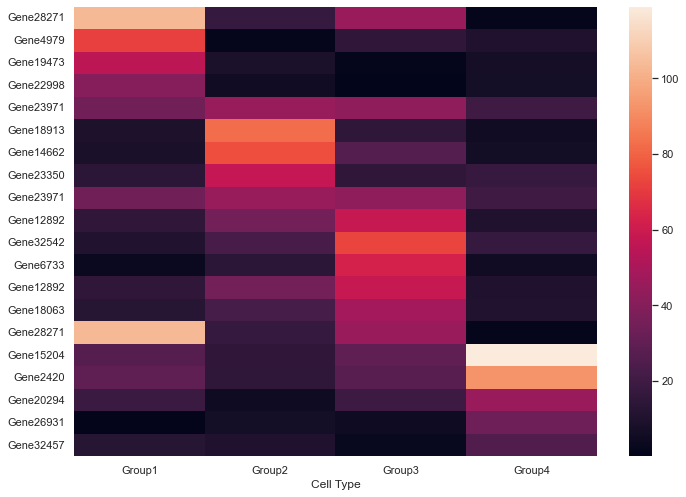

In [75]:
markers = get_most_expressed(scale_int_df, n=5)
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# scale_int_df = np.arcsinh(scale_int_df)
ax = sns.heatmap(scale_int_df.loc[markers,:])
ax.set(xlabel="Cell Type")
plt.plot()
# plt.savefig("figures/jung_att_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()
#ax.savefig("jung_att_heatmap.pdf", format="pdf", bbox_inches="tight")

In [73]:
sorted(markers)

['Gene12892',
 'Gene14662',
 'Gene15204',
 'Gene18063',
 'Gene18913',
 'Gene19473',
 'Gene20294',
 'Gene22998',
 'Gene23350',
 'Gene23971',
 'Gene2420',
 'Gene26931',
 'Gene28271',
 'Gene32457',
 'Gene32542',
 'Gene4979',
 'Gene6733']